## Mapping projections - quick activity


Follow this link (https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) to find the cartopy mapping projections and answer the following questions.

1. How many projections are available in cartopy?
2. What is the projection with a non-zero central_longitude default value?
3. Which two projections have the poles in the center of the map?
4. Which of these projections have you seen? Where? What purpose were they serving?

## Package management and import statements

Uncomment the first cell of this code. Then run both of these cells to do all of the import statements. Finally, comment out the first cell when you have finished running it.

In [ ]:
# # This code installs netcfd4 module
# # Run this code only once per notebook, then comment it out
# !pip install netcdf4

# # This code allows cartopy to work with Google Colab
# # Run this code only once per notebook
# !grep '^deb ' /etc/apt/sources.list | \
#   sed 's/^deb /deb-src /g' | \
#   tee /etc/apt/sources.list.d/deb-src.list
# !apt-get -qq update
# !apt-get -qq build-dep python3-cartopy
# !pip uninstall -y shapely
# !pip install shapely --no-binary shapely
# !pip install Cartopy

In [ ]:
# Import NumPy, Pandas, xarray, Matplotlib, datetime, cartopy
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Mapping and 2-d plotting

### Round 1 - loading in the datasets

In the class Google Drive folder, `'Zoom class slides and notebooks/2020-11-12 - class #12 -data'`, there is a file for the WOA oxygen data and the WOA temperature data.
1. Load these datasets as different variables using `xr.open_dataset()`.
> a. How are the dimensions of these datasets different? (use `display()` to take a look)
2. Take the average of these datasets in time. Select just the surface values for each dataset.
> a. What are the dimensions of these datasets now?
>
> b. Are the latitude and longitude values the same in both datasets?
3. Make the new datasets into numpy arrays for latitude, longitude, temperature, and oxygen.

In [ ]:
# Filepath for World Ocean Atlas 2018 (WOA18) temperature netCDF file

# Note: you may need to change this to match your own filepath,
# which you can get by opening the left sidebar (folder icon),
# navigating to the file, clicking the "..." on the file, and
# selecting "Copy path"
filepath_o = '/content/drive/My Drive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-11-12 - class #12 - data/woa18_oxy.nc'
filepath_t = '/content/drive/My Drive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-11-12 - class #12 - data/woa18_temp.nc'

In [ ]:
# Load the data file from Google Drive as an xarray Dataset
temp = xr.open_dataset(filepath_t)
oxy = xr.open_dataset(filepath_o, decode_times=False)

display(oxy)
display(temp)

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 1)
Coordinates:
  * time     (time) float32 8214.0
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    o_an     (time, depth, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : mole_concentrat...
    summary:                         Climatological mean dissolved oxygen for...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    id:                              woa18_all_o00_01.nc
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_start:             1900-01-01
    time_coverage_end:               2017-12-31
    time_coverage_duration:          P!!Y
    time_coverage_resolution:        P01Y
    geospatial_lat_min:              -89.5
    geospatial_lat_max:              89.5
    geospatial_lon_min:              -179.5
    geospatial_lon_max:              179.5
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Oxygen > Dissolved Oxygen
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    History:                         Translated to CF-1.0 Conventions by Netc...

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 6)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
  * time     (time) datetime64[ns] 1960-01-01 1970-01-01 ... 2011-01-01
Data variables:
    t_an     (time, depth, lat, lon) float32 ...
    t_dd     (time, depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_duration:          P10Y
    time_coverage_resolution:        P01Y
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Temperature > Water Temper...
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

In [ ]:
# Take the means and select the surface
o_data = oxy.mean(dim='time').sel(depth=0,method='nearest')
t_data = temp.mean(dim='time').sel(depth=0,method='nearest')
display(oxy)
display(temp)

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 1)
Coordinates:
  * time     (time) float32 8214.0
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    o_an     (time, depth, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : mole_concentrat...
    summary:                         Climatological mean dissolved oxygen for...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    id:                              woa18_all_o00_01.nc
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_start:             1900-01-01
    time_coverage_end:               2017-12-31
    time_coverage_duration:          P!!Y
    time_coverage_resolution:        P01Y
    geospatial_lat_min:              -89.5
    geospatial_lat_max:              89.5
    geospatial_lon_min:              -179.5
    geospatial_lon_max:              179.5
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Oxygen > Dissolved Oxygen
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    History:                         Translated to CF-1.0 Conventions by Netc...

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 6)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
  * time     (time) datetime64[ns] 1960-01-01 1970-01-01 ... 2011-01-01
Data variables:
    t_an     (time, depth, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    t_dd     (time, depth, lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_duration:          P10Y
    time_coverage_resolution:        P01Y
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Temperature > Water Temper...
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

In [ ]:
# Make numpy arrays
lat = o_data['lat'].values
lon = o_data['lon'].values

o_data = o_data['o_an'].values
t_data = t_data['t_an'].values

### Round 2 - Mapping the figure

1. Create a new figure

**Map the surface oxygen**


2. Add a subplot to the figure using `fig.add_subplot()`. This subplot should be the first of 2 rows and should have the `Robinson()` projection. Add a coastline to your plot.
3. Put a pseudocolor plot (`pcolormesh`) of oxygen onto the plot (use a transform of `PlatCarree()`).
4. Put a colorbar on the plot. Label the colorbar.

**Repeat for the surface temperature**

5. Add a subplot to the figure using `fig.add_subplot()`. This subplot should be the second of 2 rows and should have the `Robinson()` projection. Add a coastline to your plot.
6. Put a pseudocolor plot (`pcolormesh`) of oxygen onto the plot (use a transform of `PlatCarree()`).
4. Put a colorbar on the plot. Label the colorbar.


Text(0.5, 1.0, 'WOA Temperature data')

/usr/local/lib/python3.6/dist-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


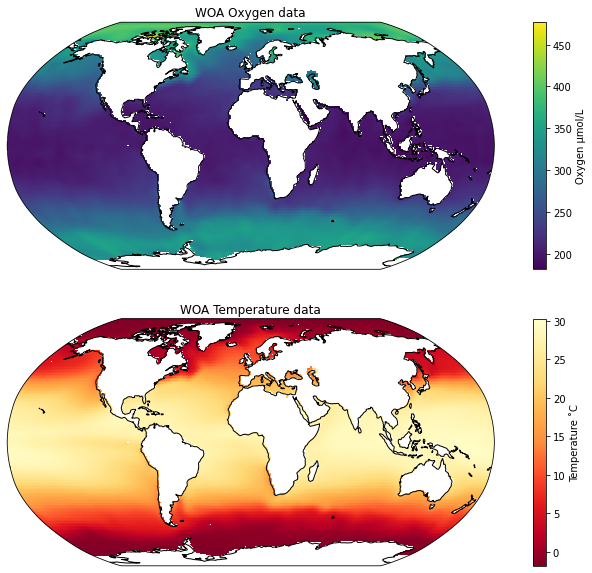

In [ ]:
# Make your figure
fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(2,1,1,projection=ccrs.Robinson())
pc_o = ax1.pcolormesh(lon,lat,o_data,transform=ccrs.PlateCarree())
ax1.coastlines()
c1 = plt.colorbar(pc_o, ax=ax1)
c1.set_label('Oxygen µmol/L')
ax1.set_title('WOA Oxygen data')

ax2 = fig.add_subplot(2,1,2,projection=ccrs.Robinson())
pc_t = ax2.pcolormesh(lon,lat,t_data,transform=ccrs.PlateCarree(),cmap='YlOrRd_r')
ax2.coastlines()
c1 = plt.colorbar(pc_t, ax=ax2)
c1.set_label('Temperature ˚C')
ax2.set_title('WOA Temperature data')
